In [52]:
#0 : idsd with exact bottom decomposition
import numpy as np
import matplotlib.pyplot as plt

class data_storage:
    b = np.array([]);
    l = np.array([]);
    t = np.array([]);
    v = np.array([]);
    d = np.array([]);
    g = np.array([]);
    s = np.array([]);

def extract_data( TXTpath ):
    X = data_storage()
    Cb = 0;
    Ct = 0;
    with open(TXTpath) as f:
        line = f.readline()
        while line:
            line = f.readline()
            if( line[0:3] == ".bk" ):
                Cb+=1;
                X.b = np.append(X.b, int(line[3:]))
            if( line[0:3] == ".ng" ):
                X.g = np.append(X.g, int(line[3:]))        
            if( line[0:3] == ".sz" ):
                X.s = np.append(X.s, int(line[3:]))
            if( line[0:3] == ".dt" ):
                X.d = np.append(X.d, int(line[3:]))
            if( line[0:3] == ".la" ):
                X.l = np.append(X.l,float(line[3:]))
            if( line[0:3] == ".ta" ):
                Ct+=1;
                X.t = np.append(X.t,float(line[3:]))
                if( Cb != Ct ):
                    print(X.b[Cb-1])
            if( line[0:3] == ".va" ):
                X.v = np.append(X.v,float(line[3:]))
            
    return X
    


SD = extract_data( 'sd/sd.txt' )
ISD = extract_data( 'isd/isd.txt' )
TDnoXOR = extract_data( 'top_noxor/top_noxor.txt' )
TDXOR = extract_data( 'top_xor/top_xor.txt' )
TDXORcs = extract_data( 'top_xor_cs/top_xor_cs.txt' )
BDapr = extract_data( 'top_bd_apr/top_bd_apr.txt' )
BDext = extract_data( 'top_bd_ext/top_bd_ext.txt' )
#X1 = extract_data( 'idsd_e/idsd_e.txt' )
#X2 = extract_data( 'isd_cs/isd_cs.txt' )
#X3 = extract_data( 'isd_nocs/isd_nocs.txt' )

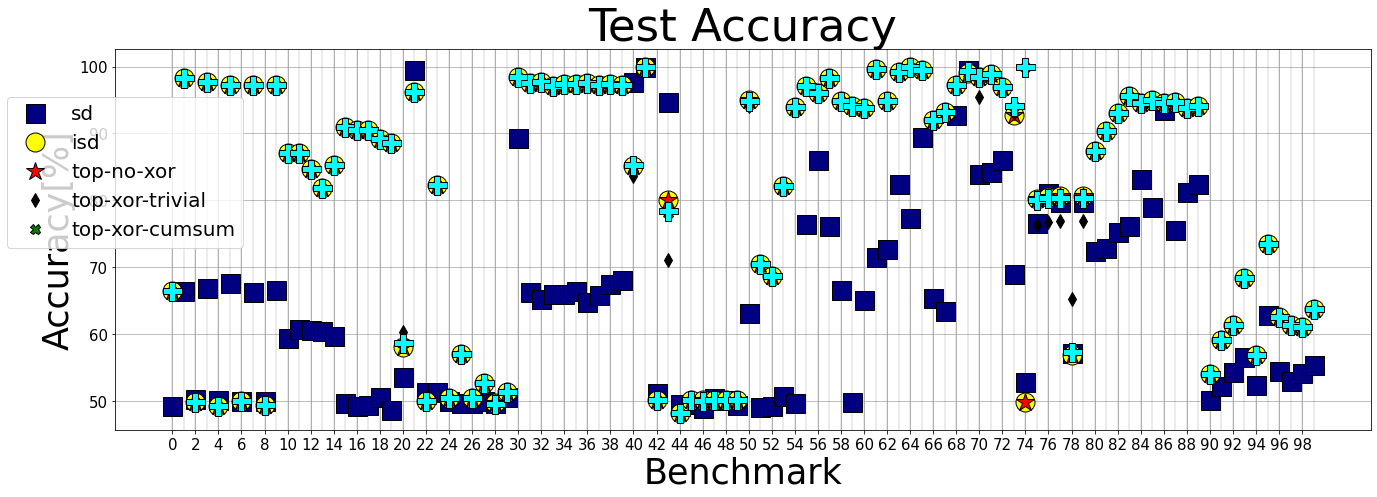

In [54]:
#import matplotlib.font_manager

fig = plt.figure(figsize=(22.5,7))
ax = plt.gca()
plt.xticks(range(0,100,2), fontsize=40)
for b in range(0,100,1):
    plt.axvline(x=b, color='k', alpha = 0.1)
plt.grid()
#lineB=plt.axvline(x=X2.b[0], color='cyan', linestyle='-', linewidth = 1.5, label = 'DSD set')
#for b in X2.b[1:]:
#    plt.axvline(x=b, color='cyan', linestyle='-', linewidth = 1.5)
#lineA = ax.axvline(x=X3.b[0], color='red', linestyle=(0, (5, 10)), linewidth = 1.5, label = 'ME set')
#for b in X3.b[1:]:
#    plt.axvline(x=b, color='red', linestyle=(0, (5, 10)), linewidth = 1.5)
line0, = ax.plot(SD.b, 100*SD.t , 's', c='#000080', alpha=1, markeredgecolor='k', markersize = 19, label = 'sd')
line1, = ax.plot(ISD.b, 100*ISD.t , 'o', c='yellow', alpha=1, markeredgecolor='k', markersize = 19, label = 'isd')
line2, = ax.plot(TDnoXOR.b, 100*TDnoXOR.t , '*', c='red', alpha=1, markeredgecolor='k', markersize = 19, label = 'top-no-xor')
line3, = ax.plot(TDXOR.b, 100*TDXOR.t , 'd', c='k', alpha=1, markeredgecolor='k', markersize = 10, label = 'top-xor-trivial')
line4, = ax.plot(TDXORcs.b, 100*TDXORcs.t , 'X', c='green', alpha=1, markeredgecolor='k', markersize = 10, label = 'top-xor-cumsum')
line5, = ax.plot(BDapr.b, 100*BDapr.t , '.', c='w', alpha=1, markeredgecolor='k', markersize = 10, label = 'top-xor-cumsum')
line6, = ax.plot(BDext.b, 100*BDext.t , 'P', c='cyan', alpha=1, markeredgecolor='k', markersize = 19, label = 'cs-isd')

ax.legend( handles = [line0,line1,line2,line3, line4], fontsize=20, bbox_to_anchor=(0.07, 0.8, 0.04, .102)) #,
           #bbox_to_anchor = (1, 0.9))
plt.rcParams["font.family"] = "sans-serif"
plt.xlabel('Benchmark', fontsize=35)
plt.ylabel('Accuracy[%]', fontsize=35)
plt.title('Test Accuracy', fontsize=45)
ax.tick_params(axis='both', which='major', labelsize=15)

In [55]:
from tabulate import tabulate
def extract_row_data( X, label ):
    return [label, 100*np.mean(X.t), np.mean(X.g), np.mean(X.s), np.mean(X.d), 100*np.mean(X.v-X.t)]

row0 = extract_row_data( SD, "sd")
row1 = extract_row_data( ISD, "isd" )
row2 = extract_row_data( TDnoXOR, "top-no xor" )
row3 = extract_row_data( TDXOR, "top xor trivial" )
row4 = extract_row_data( TDXORcs, "top xor cum sum" )
row5 = extract_row_data( BDapr, "bottom appr" )
row6 = extract_row_data( BDext, "bottom exact" )
#row3 = extract_row_data( X2, "nocs-isd" )
#row2 = extract_row_data( X2, "dkIDSD" )
#row3 = extract_row_data( X3, "dcIDSD" )
#row4 = extract_row_data( X4, "bin2-dcIDSD" )
#row5 = extract_row_data( X5, "XL-dcIDSD" )

#row2 = ["I-DSD",np.mean(t2), np.mean(g2), np.mean(s2), np.mean(d2), np.mean(np.abs(t2-v2))];
table = [ row0, row1, row2, row3, row4, row5, row6]#, row1, row2, row3] #row2
print(tabulate(table, headers = ["method","test accuracy","And gates","size","levels","overfit"], tablefmt="github"))

| method          |   test accuracy |   And gates |    size |   levels |   overfit |
|-----------------|-----------------|-------------|---------|----------|-----------|
| sd              |         64.9748 |     6134.15 | 6313.78 |   140.41 |  0.152499 |
| isd             |         80.4483 |     1107.27 | 1286.9  |    72.4  |  0.171247 |
| top-no xor      |         80.4483 |      949.74 | 1129.37 |    68.72 |  0.171247 |
| top xor trivial |         80.7577 |      962.04 | 1141.67 |    69.49 |  0.187026 |
| top xor cum sum |         80.9427 |      911.83 | 1091.46 |    68.83 |  0.156247 |
| bottom appr     |         80.9419 |     1001.23 | 1180.86 |    57.59 |  0.131558 |
| bottom exact    |         80.9537 |      910.95 | 1090.58 |    68.81 |  0.156714 |
